In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import torch
from matplotlib import pyplot as plt
import os

sns.set_theme(style="darkgrid")

# Read the data
df = pd.read_pickle("../data/token_scores.pkl")
df["gpt_any_refs"] = df["gpt_labels_refs_bool"].apply(lambda x: any(x))
df["gpt_any_refs"].value_counts()

# Clean the data
df.drop(df[df["gpt_any_refs"] == False].index, inplace=True)
df = df.reset_index()
df

,level_0,index,passage,gpt_labels_refs_bool,passage_tokens,diag_sep_passage,gpt_refs,gt_labels_refs_bool,att_rollout,grad_sam_scores,...,gpt_labels_refs,gt_labels_refs,gpt_any_refs,scores_random,has_gt_labels,gt_gpt_f1,gt_gpt_recall,grad_sam_scores_agg,grad_sam_scores_agg_2,grad_sam_scores_agg_3
0,0,0,Respond to DMV insurance letters and orders //...,"[False, False, False, False, False, False, Fal...","[Respond, to, DMV, insurance, letters, and, or...",My insurance ended so what should i do[SEP]Res...,[{'ref_span': 'surrender your vehicle registra...,None,"[tensor(0.0143), tensor(0.0026), tensor(0.0036...","[tensor(4.3173e-06), tensor(2.4501e-06), tenso...",...,"[tensor(-1.), tensor(-1.), tensor(-1.), tensor...",None,True,"[tensor(0.8823), tensor(0.9150), tensor(0.3829...",False,NaN,NaN,"[tensor(0.1667), tensor(0.1429), tensor(1.), t...","[tensor(1.), tensor(0.5000), tensor(0.3333), t...","[tensor(1.), tensor(0.5000), tensor(0.3333), t..."
1,1,1,Pay insurance lapse civil penalty // Pay ins...,"[True, True, True, True, True, False, False, T...","[Pay, insurance, lapse, civil, penalty, /, /, ...",My insurance ended so what should i do[SEP]Pay...,[{'ref_span': 'Pay insurance lapse civil penal...,None,"[tensor(0.0112), tensor(0.0089), tensor(0.0070...","[tensor(4.5446e-06), tensor(3.7075e-06), tenso...",...,"[tensor(1.), tensor(1.), tensor(1.), tensor(1....",None,True,"[tensor(0.2247), tensor(0.0624), tensor(0.1816...",False,NaN,NaN,"[tensor(0.1250), tensor(0.1429), tensor(0.5000...","[tensor(1.), tensor(0.5000), tensor(0.3333), t...","[tensor(1.), tensor(0.5000), tensor(0.3333), t..."
2,2,2,Top 5 DMV Mistakes and How to Avoid Them // ...,"[False, False, False, False, False, False, Fal...","[Top, 5, DMV, Mistakes, and, How, to, Avoid, T...",My insurance ended so what should i do[SEP]Top...,[{'ref_span': 'Make sure you turn in your vehi...,"[False, False, False, False, False, False, Fal...","[tensor(0.0085), tensor(0.0022), tensor(0.0022...","[tensor(2.0746e-06), tensor(1.7868e-06), tenso...",...,"[tensor(-1.), tensor(-1.), tensor(-1.), tensor...","[tensor(-1.), tensor(-1.), tensor(-1.), tensor...",True,"[tensor(0.4654), tensor(0.1612), tensor(0.1568...",True,0.0,0.0,"[tensor(0.2000), tensor(0.3333), tensor(1.), t...","[tensor(1.), tensor(0.5000), tensor(0.3333), t...","[tensor(1.), tensor(0.5000), tensor(0.3333), t..."
3,3,3,Respond to DMV insurance letters and orders //...,"[False, False, False, False, False, False, Fal...","[Respond, to, DMV, insurance, letters, and, or...",My insurance ended so what should i do[SEP]Res...,[{'ref_span': 'surrender your vehicle registra...,None,"[tensor(0.0238), tensor(0.0064), tensor(0.0090...","[tensor(1.0645e-06), tensor(7.3783e-07), tenso...",...,"[tensor(-1.), tensor(-1.), tensor(-1.), tensor...",None,True,"[tensor(0.0958), tensor(0.2323), tensor(0.9829...",False,NaN,NaN,"[tensor(0.5000), tensor(0.3333), tensor(1.), t...","[tensor(1.), tensor(0.5000), tensor(0.3333), t...","[tensor(1.), tensor(0.5000), tensor(0.3333), t..."
4,4,4,Insurance lapses // What will happen if I dr...,"[False, False, False, False, False, False, Fal...","[Insurance, lapses, /, /, What, will, happen, ...",My insurance ended so what should i do[SEP]Ins...,[{'ref_span': 'you could be arrested or ticket...,None,"[tensor(0.0092), tensor(0.0042), tensor(0.0041...","[tensor(1.1722e-06), tensor(1.5205e-06), tenso...",...,"[tensor(-1.), tensor(-1.), tensor(-1.), tensor...",None,True,"[tensor(0.0331), tensor(0.5088), tensor(0.9559...",False,NaN,NaN,"[tensor(0.5000), tensor(1.), tensor(0.2500), t...","[tensor(1.), tensor(0.5000), tensor(0.3333), t...","[tensor(1.), tensor(0.5000), tensor(0.3333), t..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1020,1020,1036,How to replace a registration // If your add...,"[False, False, False, False, False, False, Fal...","[How, to, replace, a, registration, /, /, If, ...",I would need to change the address and name.ag...,[{'ref_span': 'Your mailin

In [2]:
# Add random scores
torch.manual_seed(42)
df["scores_random"] = df["gpt_labels_refs_bool"].apply(lambda x: torch.rand(len(x)))

In [3]:

df["has_gt_labels"] = df["gt_labels_refs_bool"].apply(lambda x: x is not None)
inds_with_gt_label = df[df["has_gt_labels"]].index.to_list()
inds_with_gt_label

# df.iloc[inds_with_gt_label[22]]
df.iloc[inds_with_gt_label[22]]

level_0                                                                271
index                                                                  276
passage                  Commercial vehicle registration fees, vehicle ...
gpt_labels_refs_bool     [False, False, False, False, False, False, Fal...
passage_tokens           [Commercial, vehicle, registration, fees, ,, v...
diag_sep_passage         aactually, who's in charge of collecting the t...
gpt_refs                 [{'ref_span': 'The DMV collects the taxes for ...
gt_labels_refs_bool      [False, False, False, False, False, False, Fal...
att_rollout              [tensor(0.0068), tensor(0.0018), tensor(0.0013...
grad_sam_scores          [tensor(1.0783e-07), tensor(1.0917e-07), tenso...
att_cat_scores           [tensor(-5.1040e-06), tensor(3.4367e-05), tens...
mean_att_all             [tensor(0.0005), tensor(0.0004), tensor(0.0005...
mean_att_last_layer      [tensor(0.0008), tensor(0.0005), tensor(0.0008...
gpt_labels_refs          

25.265822784810126


/home/fado/miniconda3/envs/md2d-fresh/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: >

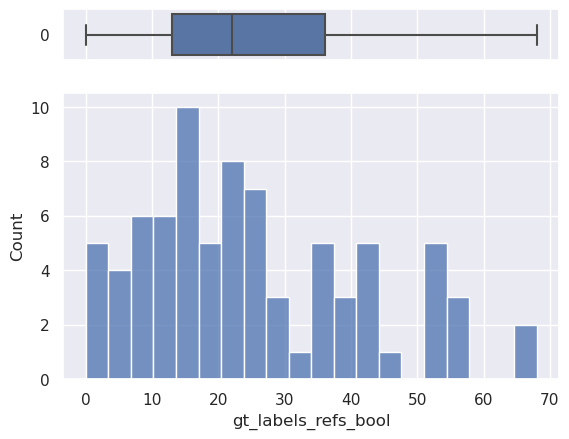

In [4]:
gt_lens = df[df["has_gt_labels"]]["gt_labels_refs_bool"].apply(lambda x: sum([int(x) for x in x])).reset_index(drop=True)

print(gt_lens.mean())

f, (ax_box, ax_hist) = plt.subplots(2, sharex=True, gridspec_kw={"height_ratios": (.15, .85)})
sns.histplot(gt_lens, bins=20, ax=ax_hist)
sns.boxplot(gt_lens, ax=ax_box, orient="h")

## Token F1 scores GT vs GPT

In [5]:
from sklearn.metrics import f1_score, recall_score

def calc_f1_score(x, y):
    if x is None or y is None:
        return None
    return f1_score(x, y)



df["gt_gpt_f1"] = df.apply(lambda x: calc_f1_score(x["gt_labels_refs"], x["gpt_labels_refs"]), axis=1)

gt_gpt_f1 = df["gt_gpt_f1"].mean()
print(f"Mean F1 score: {gt_gpt_f1}")
df["gt_gpt_f1"].value_counts()

Mean F1 score: 0.43334480239292067


gt_gpt_f1
0.000000    25
1.000000     5
0.640000     2
0.962963     2
0.758621     2
0.500000     2
0.657895     1
0.329114     1
0.816327     1
0.625000     1
0.520000     1
0.560976     1
0.682927     1
0.067797     1
0.566038     1
0.333333     1
0.794521     1
0.700000     1
0.336842     1
0.977273     1
0.444444     1
0.175824     1
0.516129     1
0.727273     1
0.823529     1
0.145833     1
0.379747     1
0.755556     1
0.230769     1
0.229508     1
0.218182     1
0.560000     1
0.873239     1
0.744186     1
0.526316     1
0.912000     1
0.285714     1
0.857143     1
0.987013     1
0.923077     1
0.428571     1
0.800000     1
0.347826     1
0.976744     1
0.323529     1
0.684211     1
0.666667     1
Name: count, dtype: int64

In [6]:

def calc_recall_score(x, y):
    if x is None or y is None:
        return None
    x1 = x.clone()
    x1[x1 == -1] = 0
    y1 = y.clone()
    y1[y1 == -1] = 0
    return recall_score(x, y)

df["gt_gpt_recall"] = df.apply(lambda x: calc_recall_score(x["gt_labels_refs"], x["gpt_labels_refs"]), axis=1)

gt_gpt_recall = df["gt_gpt_recall"].mean()
print(f"Mean recall score: {gt_gpt_recall}")
df["gt_gpt_recall"].value_counts()

Mean recall score: 0.4792707275678272


/home/fado/miniconda3/envs/md2d-fresh/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/fado/miniconda3/envs/md2d-fresh/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/fado/miniconda3/envs/md2d-fresh/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/fado/miniconda3/envs/md2d-fresh/lib/python3.11/site-packages/skl

gt_gpt_recall
0.000000    25
1.000000    14
0.954545     3
0.928571     2
0.470588     2
0.611111     2
0.571429     1
0.761905     1
0.700000     1
0.615385     1
0.933333     1
0.937500     1
0.464286     1
0.789474     1
0.805556     1
0.086957     1
0.518519     1
0.638889     1
0.296296     1
0.538462     1
0.565217     1
0.192982     1
0.283019     1
0.210526     1
0.736842     1
0.290323     1
0.974359     1
0.222222     1
0.838235     1
0.357143     1
0.592593     1
0.775000     1
0.875000     1
0.250000     1
0.179487     1
0.340909     1
0.636364     1
Name: count, dtype: int64

In [7]:
from custom_data_utils import utils
from IPython.display import display, HTML

def show_highlighted_passage(record, gt_bools_label, scores_label):
    highlighted_passage = utils.create_highlighted_passage(record["passage_tokens"],
                                                        gt_bools_label,
                                                        scores_label,
                                                        'green',
                                                        'linear')
    display(HTML("\n".join(highlighted_passage)))

record_min_f1 = df[df["gt_gpt_f1"] == 0].index[0]
record_max_f1 = df[df["gt_gpt_f1"] == df["gt_gpt_f1"].max()].index[0]

record_min = df.iloc[record_min_f1]
record_max = df.iloc[record_max_f1]

show_highlighted_passage(record_min, record_min["gt_labels_refs_bool"], record_min["gpt_labels_refs_bool"])
show_highlighted_passage(record_max, record_max["gt_labels_refs_bool"], record_max["gpt_labels_refs_bool"])


/home/fado/miniconda3/envs/md2d-fresh/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


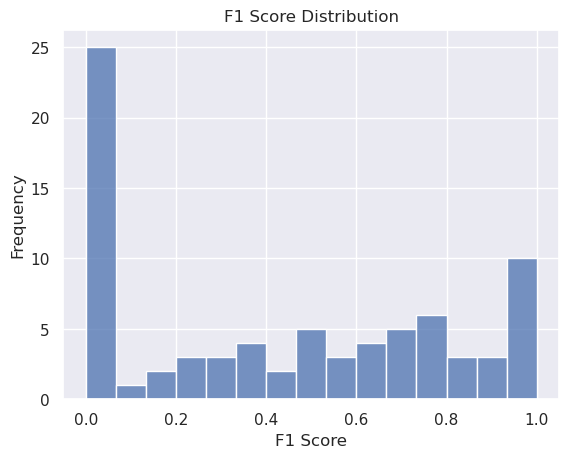

/home/fado/miniconda3/envs/md2d-fresh/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


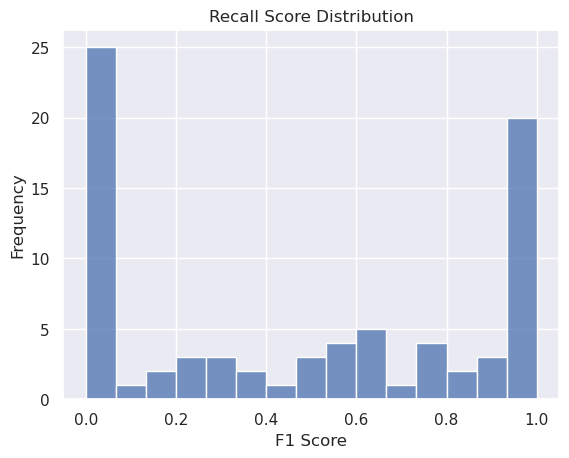

In [8]:
import seaborn as sns
import matplotlib.pyplot as plt

def plot_scores(df, col, title):
    sns.histplot(data=df, x=col, bins=15)
    plt.xlabel("F1 Score")
    plt.ylabel("Frequency")
    plt.title(title)
    plt.show()

plot_scores(df, "gt_gpt_f1", "F1 Score Distribution")
plot_scores(df, "gt_gpt_recall", "Recall Score Distribution")

## Token F1 scores GPT vs scoring

In [9]:
from tqdm import tqdm

def get_top_k_indexes(scores: torch.Tensor, top_k=5):
    top_k_scores, top_k_indexes = torch.topk(scores.flatten(), top_k)
    conv_ids = torch.stack(torch.unravel_index(top_k_indexes, scores.shape)).T
    # Ensure only top_k, because torch.topk returns more than k, when duplicated values
    return conv_ids[:top_k]


def threshold_top_k(scores, top_k):
    top_k = top_k if top_k < len(scores) else len(scores) 
    top_k_indexes = get_top_k_indexes(  scores, top_k)
    thresholded_scores = torch.ones_like(scores) * -1  # Negative label in data is -1
    thresholded_scores[top_k_indexes] = 1
    return thresholded_scores


top_k_tokens_range = range(5, 250)

def calc_thresholding_f1(gt_label, save_filename, score_labels):
    f1_scores = []
    for score_label in score_labels:
        for top_k_tokens in tqdm(top_k_tokens_range, desc=f"Top-k tokens for label: {score_label}"):
            df["running_threshold"] = df[score_label].apply(lambda x: threshold_top_k(x, top_k_tokens))
            running_f1 = df.apply(lambda x: calc_f1_score(x["running_threshold"], x[gt_label]), axis=1)
            f1_scores.append({
                "score_label": score_label,
                "k_tokens": top_k_tokens,
                "f1-value": running_f1.mean()
            })

            # Sanity check
            if top_k_tokens in [30, 100]:
                # Print aggregated f1 scores
                print(f"Label: {score_label} with top-{top_k_tokens} tokens has f1 mean: {running_f1.mean():0.4f}")
                
                # Print f1 for random sample
                rnd_record_id = inds_with_gt_label[22]
                record = df.iloc[rnd_record_id]
                print(f"rnd-record({rnd_record_id}) f1: {running_f1.iloc[rnd_record_id]:0.4f}")

                # Show threshold annotation
                gt_label_bool = gt_label + "_bool"
                record["running_threshold"][record["running_threshold"] == -1] = 0  # -1 to calc f1, 0 for vizualizations
                show_highlighted_passage(record, record[gt_label_bool], record["running_threshold"])

    torch.save(f1_scores, save_filename)



In [10]:
def show_thresholding_f1_scores(f1_scores, show_gt_gpt_f1=True):
    f1_data = pd.DataFrame(f1_scores)
    
    # Create a Seaborn plot
    plt.figure(figsize=(14, 10))  # Optional: Change figure size if needed
    sns.lineplot(x='k_tokens', y='f1-value', hue='score_label', data=f1_data)
    if show_gt_gpt_f1:
        sns.lineplot(x=f1_data['k_tokens'], y=gt_gpt_f1, linestyle='--', label='gt_gpt_f1')
    # Add labels and title
    plt.ylabel('token-F1 score')
    plt.xlabel('Top K Tokens')
    plt.title('token-F1 Score vs Top K Tokens')

    # Show the plot
    plt.show()

In [11]:
def calcl_show_f1(f1_gt_loc, gt_label, score_labels, recalc=True, show=True):
    if recalc or not os.path.exists(f1_gt_loc):
        calc_thresholding_f1(gt_label, f1_gt_loc, score_labels)
    f1_scores_gt = torch.load(f1_gt_loc)
    if show:
        show_thresholding_f1_scores(f1_scores_gt)
    return f1_scores_gt

/home/fado/miniconda3/envs/md2d-fresh/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/home/fado/miniconda3/envs/md2d-fresh/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/home/fado/miniconda3/envs/md2d-fresh/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/home/fado/miniconda3/envs/md2d-fresh/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option i

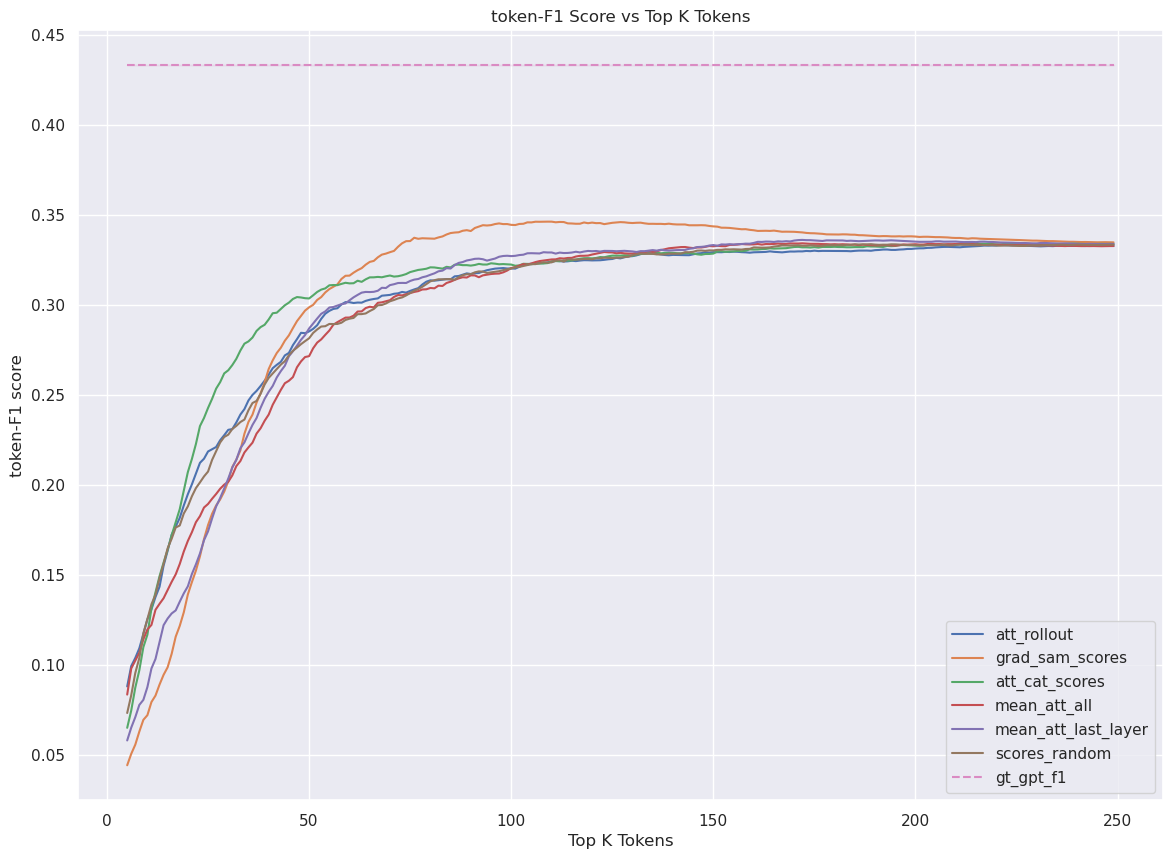

In [12]:
default_score_labels = [
    'att_rollout',
    'grad_sam_scores',
    'att_cat_scores',
    'mean_att_all',
    'mean_att_last_layer',
    'scores_random'
]

f1_gt = calcl_show_f1("../data/f1_scors_gt.pt", "gt_labels_refs", default_score_labels, recalc=False)
# Run time: cca 6min
# Less data -> more noisy  

/home/fado/miniconda3/envs/md2d-fresh/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/home/fado/miniconda3/envs/md2d-fresh/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/home/fado/miniconda3/envs/md2d-fresh/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/home/fado/miniconda3/envs/md2d-fresh/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option i

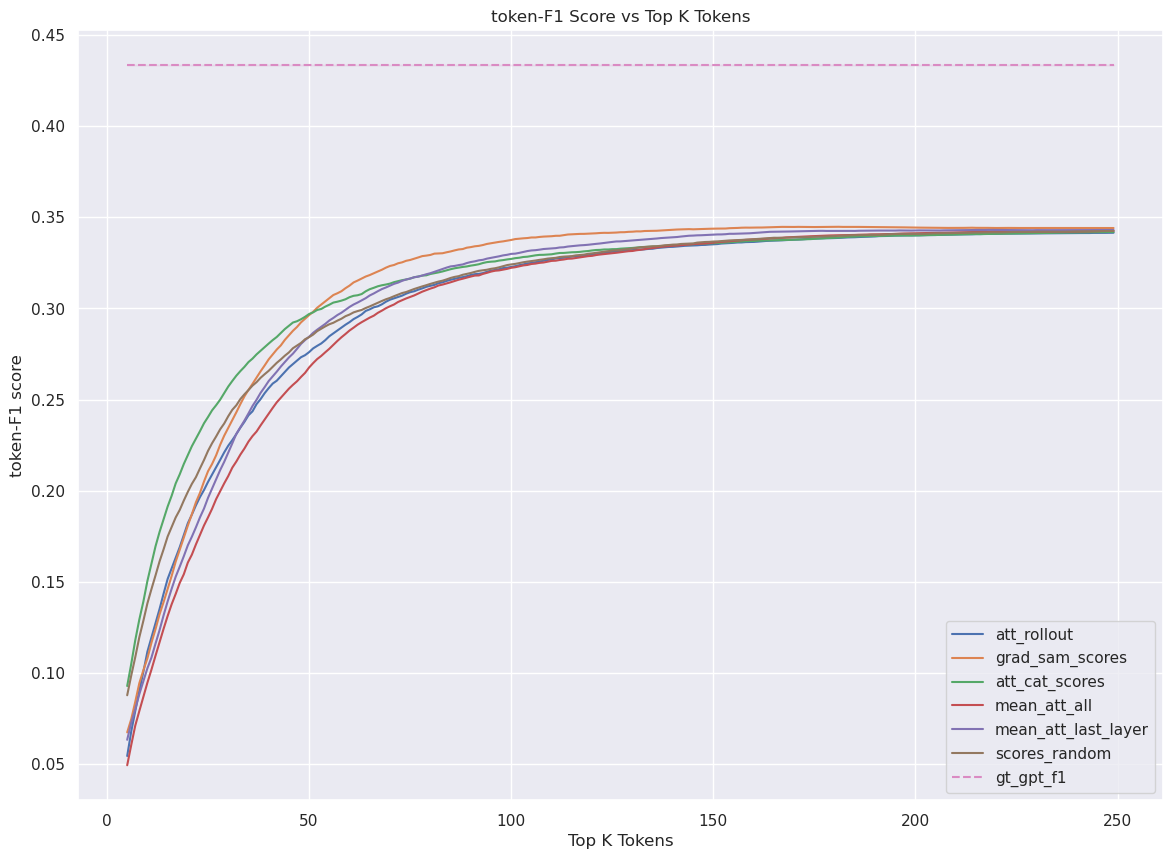

In [13]:


f1_gpt = calcl_show_f1("../data/f1_scors_gpt.pt", "gpt_labels_refs", default_score_labels, recalc=False)
# Run time: cca 36 min

## Span aggregation evaluation

In [14]:
# Get top-200 sorted indexes according to values in the matrix
# add tokens based on this values
# make list of tokens 
# boolean mask of selected spans is goal


def sort_matrix_indexes(matrix_scores, row_len):    
    # Transforms matrix of span scores to list of indexes
    # First index (p, q) corresponds the span with the highest score
    # Returns sorted indexes [(p1, q1), (p2, q2), ...]
    top_k = row_len * (row_len - 1) // 2
    return get_top_k_indexes(matrix_scores, top_k)


def find_relevant_tokens(matrix_indexes, row_len):
    # Takes sorted indexes [(p1, q1), (p2, q2), ...]
    # And creates a list of token indexes, where first index is the most relevant token index
    # Returns list of token indexes [p1, p1+1, ..., q1, ...]
    max_tokens_to_take = len(top_k_tokens_range) if len(top_k_tokens_range) < row_len else row_len

    best_tokens = []
    for p, q in matrix_indexes: 
        if max_tokens_to_take < len(best_tokens):
            break
        
        # +1 because range is exclusive
        for idx in range(p, q + 1):
            if idx not in best_tokens:
                best_tokens.append(idx)
    return best_tokens


def get_token_scores(best_tokens, row_len):
    # Takes list of token indexes [p1, p1+1, ..., q1, ...]
    # and transforms it to token scores
    # token od idx p1 has score 1, on p2=1/2, ..., on pn=1/n, ...
    # Others are 0
    x = torch.zeros(row_len)
    for score, idx in enumerate(best_tokens, start=1):
        x[idx] = 1 / score
    return x

def span_to_token_scores(matrix_scores):
    # Takes matrix of span scores and returns token scores
    row_len = len(matrix_scores[0])
    sorted_indexes = sort_matrix_indexes(matrix_scores, row_len)
    best_tokens = find_relevant_tokens(sorted_indexes, row_len)
    token_scores = get_token_scores(best_tokens, row_len)
    return token_scores


In [15]:
def cumsum_token_scores(a):
    a_rows = a.repeat((a.shape[-1], 1)).to(a.device)
    a_cumsum = torch.cumsum(torch.triu(a_rows), dim=-1)
    a_cumsum[a_cumsum < 0] = 0
    return a_cumsum

span_lens_default = cumsum_token_scores(torch.ones(512))


def cumsum_aggregate_tokenize(scores, agg_fce, *agg_fce_args):
    return span_to_token_scores(agg_fce(cumsum_token_scores(scores), *agg_fce_args))


## Aggregation strategy 1

In [16]:
def span_aggregation(scores, N, K):
    span_lens = span_lens_default[:scores.size(0), :scores.size(0)]
    agg_scoring = scores * ((1 + N) * (span_lens + K) / span_lens)
    # posinfs are created by dividing with zero span length (under diag)
    return torch.triu(agg_scoring)

recalc = False
if recalc:
    # Parameters optimized in the other notebook
    grad_sam_K = 200
    grad_sam_N = 30
    df["grad_sam_scores_agg"] = df["grad_sam_scores"].apply(lambda x: cumsum_aggregate_tokenize(x, span_aggregation, grad_sam_N, grad_sam_K))
    df.to_pickle("../data/token_scores.pkl")



## Aggregation strategy 2

In [17]:

def span_aggregation2(scores, N, K):
    span_lens = span_lens_default[:scores.size(0), :scores.size(0)]
    agg_scoring = (scores / (span_lens + K))**N
    # posinfs are created by dividing with zero span length (under diag)
    return torch.triu(agg_scoring)

if recalc:
    grad_sam_K = 120
    grad_sam_N = 1.9
    df["grad_sam_scores_agg_2"] = df["grad_sam_scores"].apply(lambda x: cumsum_aggregate_tokenize(x, span_aggregation2, grad_sam_N, grad_sam_K))
    df.to_pickle("../data/token_scores.pkl")


## Aggregation strategy 3

In [18]:

def span_aggregation3(scores):
    span_lens = span_lens_default[:scores.size(0), :scores.size(0)]
    scores = scores / torch.max(scores) * torch.max(span_lens)
    agg_scoring = scores - span_lens
    return torch.triu(agg_scoring)

if recalc:
    df["grad_sam_scores_agg_3"] = df["grad_sam_scores"].apply(lambda x: cumsum_aggregate_tokenize(x, span_aggregation3))
    df.to_pickle("../data/token_scores.pkl")



Top-k tokens for label: grad_sam_scores_agg:  10%|█         | 25/245 [00:03<00:29,  7.48it/s]

Label: grad_sam_scores_agg with top-30 tokens has f1 mean: 0.2395
rnd-record(271) f1: 0.5287


Top-k tokens for label: grad_sam_scores_agg:  39%|███▉      | 95/245 [00:13<00:21,  7.04it/s]

Label: grad_sam_scores_agg with top-100 tokens has f1 mean: 0.3653
rnd-record(271) f1: 0.7261


Top-k tokens for label: grad_sam_scores_agg_2:  10%|█         | 25/245 [00:03<00:30,  7.25it/s]

Label: grad_sam_scores_agg_2 with top-30 tokens has f1 mean: 0.1897
rnd-record(271) f1: 0.2529


Top-k tokens for label: grad_sam_scores_agg_2:  39%|███▉      | 95/245 [00:13<00:21,  7.12it/s]

Label: grad_sam_scores_agg_2 with top-100 tokens has f1 mean: 0.3507
rnd-record(271) f1: 0.7261


Top-k tokens for label: grad_sam_scores_agg_3:  10%|█         | 25/245 [00:03<00:33,  6.62it/s]

Label: grad_sam_scores_agg_3 with top-30 tokens has f1 mean: 0.2042
rnd-record(271) f1: 0.2529


Top-k tokens for label: grad_sam_scores_agg_3:  39%|███▉      | 95/245 [00:13<00:19,  7.54it/s]

Label: grad_sam_scores_agg_3 with top-100 tokens has f1 mean: 0.3692
rnd-record(271) f1: 0.7261


Top-k tokens for label: grad_sam_scores_agg_3: 100%|██████████| 245/245 [00:33<00:00,  7.40it/s]
/home/fado/miniconda3/envs/md2d-fresh/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/home/fado/miniconda3/envs/md2d-fresh/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/home/fado/miniconda3/envs/md2d-fresh/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/home/fado/miniconda3/envs/md2d-f

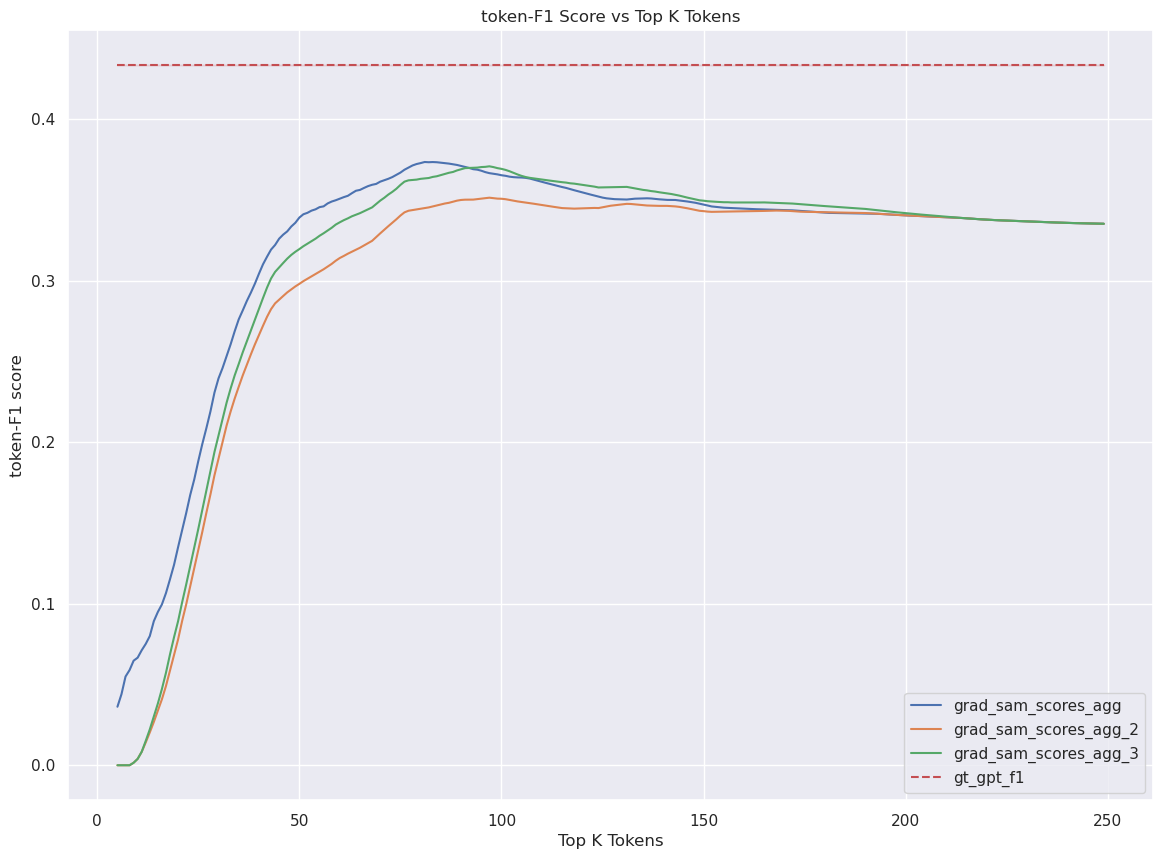

/home/fado/miniconda3/envs/md2d-fresh/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/home/fado/miniconda3/envs/md2d-fresh/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/home/fado/miniconda3/envs/md2d-fresh/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/home/fado/miniconda3/envs/md2d-fresh/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option i

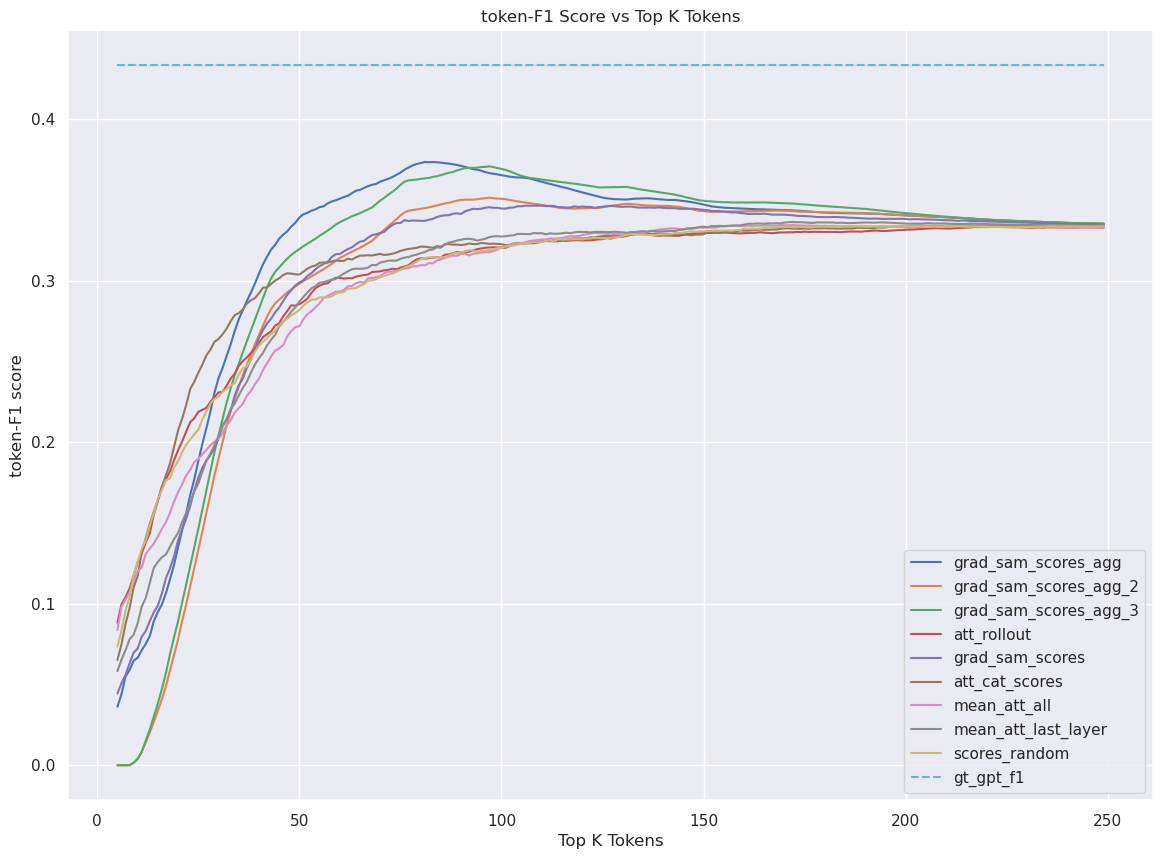

In [19]:
df = pd.read_pickle("../data/token_scores.pkl")

aggregated_score_labels = ["grad_sam_scores_agg", "grad_sam_scores_agg_2", "grad_sam_scores_agg_3"]
grad_sam_agg1_f1 = calcl_show_f1("../data/f1_scors_gt_agg.pt", "gt_labels_refs", aggregated_score_labels, recalc=True, show=True)

all_data = grad_sam_agg1_f1 + f1_gt
show_thresholding_f1_scores(all_data)

/home/fado/miniconda3/envs/md2d-fresh/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/home/fado/miniconda3/envs/md2d-fresh/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


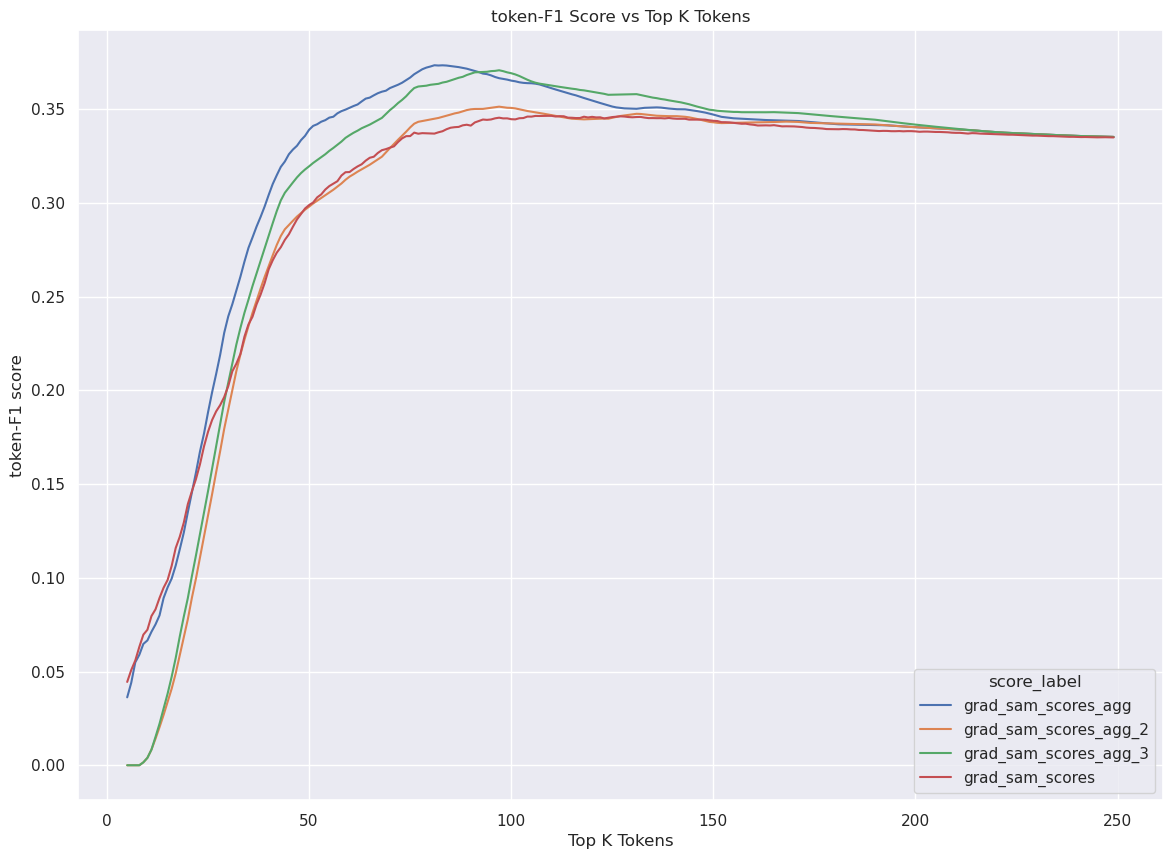

In [20]:
grad_sam_labels = ["grad_sam_scores", "grad_sam_scores_agg", "grad_sam_scores_agg_2", "grad_sam_scores_agg_3"]
grad_sam_data = [d for d in all_data if d["score_label"] in grad_sam_labels]
show_thresholding_f1_scores(grad_sam_data, show_gt_gpt_f1=False)



In [21]:


def compare_thresholding(compare_labels, gt_record_index = 22, top_k_tokens = 40, gt_label = "gt_labels_refs"):

    for score_label in compare_labels:
        df["running_threshold"] = df[score_label].apply(lambda x: threshold_top_k(x, top_k_tokens))
        running_f1 = df.apply(lambda x: calc_f1_score(x["running_threshold"], x[gt_label]), axis=1)

        # Print aggregated f1 scores
        print(f"Label: {score_label} with top-{top_k_tokens} tokens has f1 mean: {running_f1.mean():0.4f}")
        
        # Print f1 for random sample
        rnd_record_id = inds_with_gt_label[gt_record_index]
        record = df.iloc[rnd_record_id]
        print(f"rnd-record({rnd_record_id}) f1: {running_f1.iloc[rnd_record_id]:0.4f}")

        # Show threshold annotation
        gt_label_bool = gt_label + "_bool"
        record["running_threshold"][record["running_threshold"] == -1] = 0  # -1 to calc f1, 0 for vizualizations
        show_highlighted_passage(record, record[gt_label_bool], record["running_threshold"])

compare_thresholding(grad_sam_labels, gt_record_index=22, top_k_tokens=25, gt_label="gt_labels_refs")

Label: grad_sam_scores with top-25 tokens has f1 mean: 0.1779
rnd-record(271) f1: 0.2927


Label: grad_sam_scores_agg with top-25 tokens has f1 mean: 0.1883
rnd-record(271) f1: 0.4634


Label: grad_sam_scores_agg_2 with top-25 tokens has f1 mean: 0.1333
rnd-record(271) f1: 0.1463


Label: grad_sam_scores_agg_3 with top-25 tokens has f1 mean: 0.1463
rnd-record(271) f1: 0.1463
